In [6]:
# All import statements

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Libraries for implementing a CNN
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical

C:\Users\taman01\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
# Fetching data and adding to data frames

In [10]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [14]:
# Display data

In [15]:
labels = train.pop('label')  #Pops the label column and stores in 'labels'
labels = to_categorical(labels)
train = train.values
train = np.array([np.reshape(i, (28,28)) for i in train])
train = train / 255

In [17]:
# Training and validation set

In [18]:
X_train, X_val, y_train, y_val = train_test_split(train, labels, test_size=0.3, random_state=41)
#Reshaping the training and validation sets
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_val = X_val.reshape(X_val.shape[0], 28,28,1)

In [19]:
# Building CNN network

In [20]:
#Building Our CNN
model = Sequential()
model.add(Conv2D(8, (3,3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(25, activation='softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               51328     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

In [21]:
model.compile(loss = 'categorical_crossentropy', 
optimizer='adam', metrics=['accuracy'])

#Code for Training our Model
history = model.fit(X_train, y_train, validation_data = 
(X_val, y_val), epochs=50, batch_size=512)

Train on 19218 samples, validate on 8237 samples
Epoch 1/50
19218/19218 [==============================] - 6s 292us/step - loss: 3.1225 - acc: 0.1033 - val_loss: 2.8968 - val_acc: 0.2719
Epoch 2/50
19218/19218 [==============================] - 5s 283us/step - loss: 2.4901 - acc: 0.2934 - val_loss: 1.8532 - val_acc: 0.5600
Epoch 3/50
19218/19218 [==============================] - 5s 283us/step - loss: 1.7311 - acc: 0.4714 - val_loss: 1.2479 - val_acc: 0.7010
Epoch 4/50
19218/19218 [==============================] - 5s 275us/step - loss: 1.3240 - acc: 0.5839 - val_loss: 0.9537 - val_acc: 0.7493
Epoch 5/50
19218/19218 [==============================] - 5s 259us/step - loss: 1.0580 - acc: 0.6685 - val_loss: 0.7328 - val_acc: 0.7973
Epoch 6/50
19218/19218 [==============================] - 5s 284us/step - loss: 0.8936 - acc: 0.7160 - val_loss: 0.6162 - val_acc: 0.8270
Epoch 7/50
19218/19218 [==============================] - 6s 304us/step - loss: 0.7727 - acc: 0.7523 - val_loss: 0.5303 - v

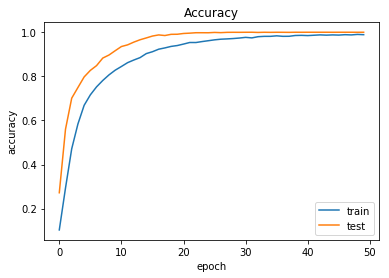

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [23]:
# Testing model

In [24]:
y_test = test.pop('label')
y_test = to_categorical(y_test)
y_test.shape
X_test = test.values
X_test = np.array([np.reshape(i, (28,28)) for i in X_test])
X_test = X_test / 255
X_test = X_test.reshape(X_test.shape[0], 28,28,1)
X_test.shape

#Recognizing images on the test dataset
predictions = model.predict(X_test)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
print("The test accuracy is: ", test_accuracy)

The test accuracy is:  0.9210819854991634


In [ ]:
# Accuracy of 92%

# Happy learning